In [1]:
import numpy as np
import ase.io

from trial_moves import *
from potentials import *
from metropolis import *
import ase
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
frames = ase.io.read("two_benzenes.xyz", ":")
ell_frames = ase.io.read("two_ellipsoids.xyz", ":")

In [3]:
for ell_frame, frame in zip(ell_frames, frames):
    ell_frame.info["energy"] = frame.get_total_energy()

In [4]:
metro = MetropolisCalculator(ell_frames[5], ell_frames[5].info["energy"])

In [5]:
metro.calculate_trajectory(10000)

trial energy: -3201.2872082627455
old energy: -3201.3338536163146; new energy: -3201.2872082627455
r: 0.9740886954793225; compared to: 0.16458587048291717
new energy - old energy: 0.04664535356914712
keep move: False
old energy kept: -3201.3338536163146
trial energy: -3201.339780356397
old energy: -3201.3338536163146; new energy: -3201.339780356397
r: 0.8787914743241376; compared to: 1.2576646418076556
new energy - old energy: -0.0059267400824865035
keep move: True
trial energy added: -3201.339780356397
trial energy: -3201.3890312093913
old energy: -3201.339780356397; new energy: -3201.3890312093913
r: 0.9346871852701106; compared to: 6.720133723103409
new energy - old energy: -0.04925085299419152
keep move: True
trial energy added: -3201.3890312093913
trial energy: -3201.3479336131463
old energy: -3201.3890312093913; new energy: -3201.3479336131463
r: 0.12850863351453656; compared to: 0.20398149474566596
new energy - old energy: 0.041097596244981105
keep move: True
trial energy added:

In [6]:
np.std(metro.energies)

np.float64(24.36908684684203)

(0.0, 1.0)

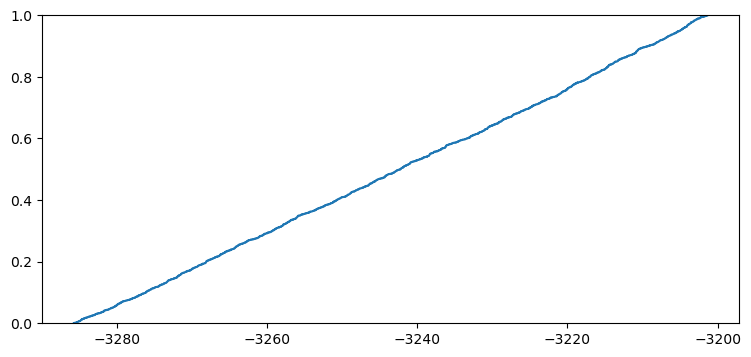

In [7]:
fig = plt.figure(figsize=(9, 4))
ax = fig.subplots()
ax.ecdf(metro.energies)
ax.set_ylim(0, 1)

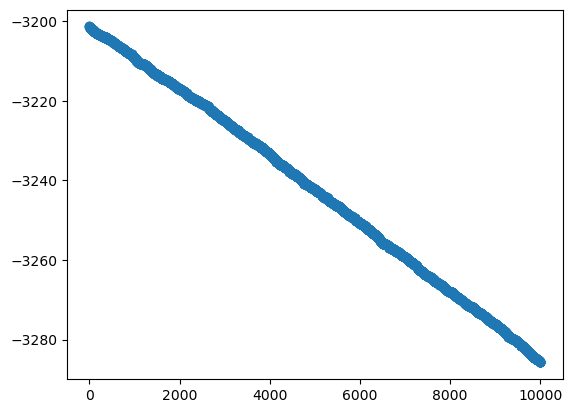

In [8]:
plt.scatter(np.arange(len(metro.energies)), metro.energies)

In [9]:
metro.energies

[np.float64(-3201.3338536163146),
 np.float64(-3201.3338536163146),
 np.float64(-3201.339780356397),
 np.float64(-3201.3890312093913),
 np.float64(-3201.3479336131463),
 np.float64(-3201.3479336131463),
 np.float64(-3201.3397108558406),
 np.float64(-3201.3397108558406),
 np.float64(-3201.381317033157),
 np.float64(-3201.381317033157),
 np.float64(-3201.4076360556205),
 np.float64(-3201.4545546534478),
 np.float64(-3201.4545546534478),
 np.float64(-3201.469945756888),
 np.float64(-3201.457617609384),
 np.float64(-3201.446036039874),
 np.float64(-3201.481180576003),
 np.float64(-3201.5128715112623),
 np.float64(-3201.5514302142933),
 np.float64(-3201.5999683362447),
 np.float64(-3201.6012931821842),
 np.float64(-3201.6012931821842),
 np.float64(-3201.6448369540867),
 np.float64(-3201.6407281355314),
 np.float64(-3201.6441382796306),
 np.float64(-3201.6339919346747),
 np.float64(-3201.6750990516757),
 np.float64(-3201.667198783057),
 np.float64(-3201.690240232675),
 np.float64(-3201.68459